# COGS 118B Project





In [2]:
import csv
import pandas as pd
import numpy as np

#name the columns
colnames=['age', 'workclass',  'fnlwgt', 'education', 
          'education-num', 'marital-status', 'occupation', 
          'relation-ship', 'race', 'sex', 'capital-gain', 
          'capital-loss', 'hours-per-week', 'native-country', 'income']

# read data in df
df = pd.read_csv('adult.data', names=colnames, header=None)


In [3]:
# display df header
data_top = df.head()   
data_top

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relation-ship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Drop null values

In [4]:
df.shape #before dropping nulls

(32561, 15)

In [5]:
for i in colnames:   #ignores all null values
    df = df[(df[i] != ' ?')]

C:\Users\janin\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [6]:
df.shape #after dropping nulls

(30162, 15)

### Keep income only from Americans since it represents most of the data

In [7]:
df = df[(df['native-country'] == ' United-States')]

### One hot encode

In [8]:
new_df = df[['age','fnlwgt','education-num','capital-gain',
             'capital-loss','hours-per-week']]
one_hot_cols = ['workclass', 'education', 'marital-status',
                'occupation','relation-ship','race']
for i in one_hot_cols:
    new_df = new_df.join(pd.get_dummies(df[i],prefix = i))
    
new_df['income'] = pd.DataFrame((df['income'] == ' >50K').astype(int))

In [9]:
for i in new_df.columns: #print new columns
    print(i)

age
fnlwgt
education-num
capital-gain
capital-loss
hours-per-week
workclass_ Federal-gov
workclass_ Local-gov
workclass_ Private
workclass_ Self-emp-inc
workclass_ Self-emp-not-inc
workclass_ State-gov
workclass_ Without-pay
education_ 10th
education_ 11th
education_ 12th
education_ 1st-4th
education_ 5th-6th
education_ 7th-8th
education_ 9th
education_ Assoc-acdm
education_ Assoc-voc
education_ Bachelors
education_ Doctorate
education_ HS-grad
education_ Masters
education_ Preschool
education_ Prof-school
education_ Some-college
marital-status_ Divorced
marital-status_ Married-AF-spouse
marital-status_ Married-civ-spouse
marital-status_ Married-spouse-absent
marital-status_ Never-married
marital-status_ Separated
marital-status_ Widowed
occupation_ Adm-clerical
occupation_ Armed-Forces
occupation_ Craft-repair
occupation_ Exec-managerial
occupation_ Farming-fishing
occupation_ Handlers-cleaners
occupation_ Machine-op-inspct
occupation_ Other-service
occupation_ Priv-house-serv
occupat

In [10]:
new_df.head(10)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,relation-ship_ Other-relative,relation-ship_ Own-child,relation-ship_ Unmarried,relation-ship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,income
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
5,37,284582,14,0,0,40,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
7,52,209642,9,0,0,45,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
8,31,45781,14,14084,0,50,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
9,42,159449,13,5178,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
10,37,280464,10,0,0,80,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
12,23,122272,13,0,0,30,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0


In [11]:
new_df.shape   #shape after all cleaning

(27504, 62)

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

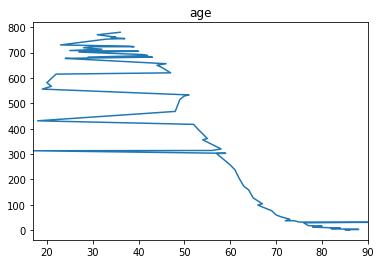

In [13]:
# plot age distribution
df.astype({'age': 'int32'}).dtypes

fig, ax = plt.subplots()
df['age'].value_counts().plot(ax=ax, title = 'age')



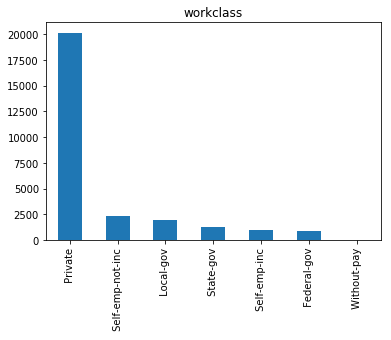

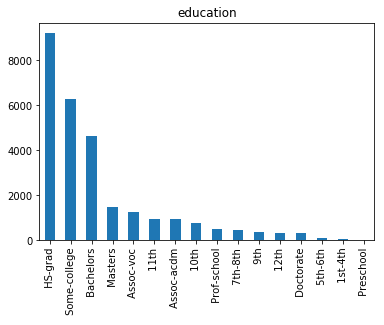

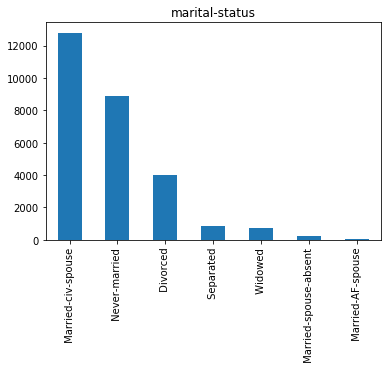

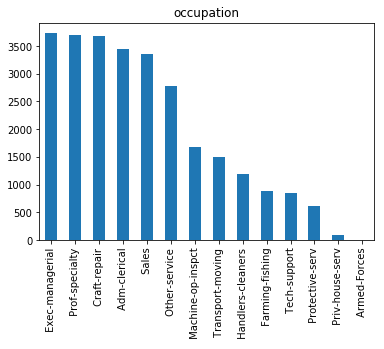

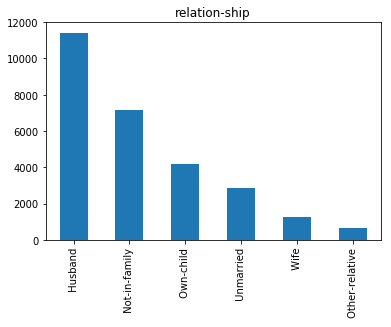

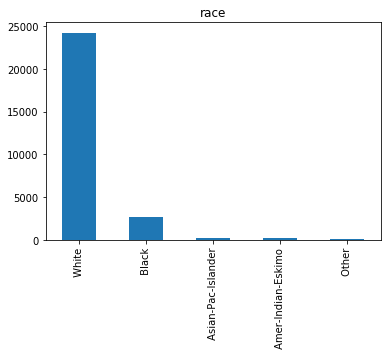

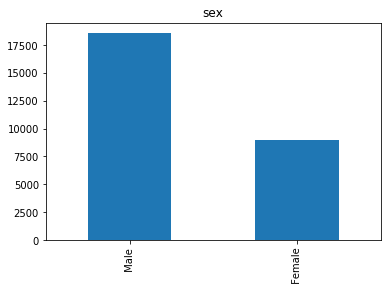

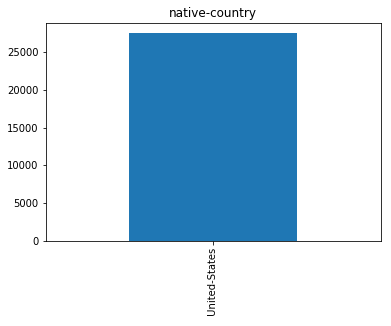

In [14]:
# plotting the frequency of the values

string_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relation-ship', 'race', 'sex', 'native-country']

#print(string_columns)
for col in string_columns: 
    fig, ax = plt.subplots()
    df[col].value_counts().plot(ax=ax, kind='bar', title = col)

## PCA


In [64]:
# center the data
# do we have to do this ? 
from sklearn.preprocessing import StandardScaler
features = list(new_df.columns[:-1])
# Separating out the features
x = new_df.loc[:, features].values
# Separating out the target
y = new_df.loc[:,['income']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
#print(x)
# confirm that data has mean of 0 and variance of 1
pd.DataFrame(x).describe()


C:\Users\janin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\janin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
count,2.750400e+04,2.750400e+04,2.750400e+04,2.750400e+04,2.750400e+04,2.750400e+04,2.750400e+04,2.750400e+04,2.750400e+04,2.750400e+04,...,2.750400e+04,2.750400e+04,2.750400e+04,2.750400e+04,2.750400e+04,2.750400e+04,2.750400e+04,2.750400e+04,2.750400e+04,2.750400e+04
mean,-3.391299e-16,-1.333164e-16,-3.761211e-16,1.628141e-15,-1.134001e-15,8.207785e-16,5.673969e-16,-9.986356e-16,3.668451e-17,5.006660e-16,...,-8.000113e-16,1.143022e-15,-1.045079e-15,-1.434966e-16,-1.161407e-15,1.837979e-16,-1.122795e-15,9.096410e-16,6.062349e-16,6.365698e-16
std,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,...,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00
min,-1.631075e+00,-1.654729e+00,-3.876831e+00,-1.492183e-01,-2.210063e-01,-3.319601e+00,-1.824438e-01,-2.766980e-01,-1.652995e+00,-1.933336e-01,...,-5.915706e-01,-1.548424e-01,-4.236956e-01,-3.418601e-01,-2.182927e-01,-9.975551e-02,-1.001266e-01,-3.250976e-01,-6.422961e-02,-2.714784e+00
25%,-7.967382e-01,-6.798853e-01,-5.137704e-01,-1.492183e-01,-2.210063e-01,-8.064064e-02,-1.824438e-01,-2.766980e-01,-1.652995e+00,-1.933336e-01,...,-5.915706e-01,-1.548424e-01,-4.236956e-01,-3.418601e-01,-2.182927e-01,-9.975551e-02,-1.001266e-01,-3.250976e-01,-6.422961e-02,3.683534e-01
50%,-1.140987e-01,-9.782594e-02,-9.338779e-02,-1.492183e-01,-2.210063e-01,-8.064064e-02,-1.824438e-01,-2.766980e-01,6.049625e-01,-1.933336e-01,...,-5.915706e-01,-1.548424e-01,-4.236956e-01,-3.418601e-01,-2.182927e-01,-9.975551e-02,-1.001266e-01,-3.250976e-01,-6.422961e-02,3.683534e-01
75%,6.443897e-01,4.493147e-01,1.167760e+00,-1.492183e-01,-2.210063e-01,3.346107e-01,-1.824438e-01,-2.766980e-01,6.049625e-01,-1.933336e-01,...,1.690415e+00,-1.548424e-01,-4.236956e-01,-3.418601e-01,-2.182927e-01,-9.975551e-02,-1.001266e-01,-3.250976e-01,-6.422961e-02,3.683534e-01
max,3.905890e+00,1.239141e+01,2.428908e+00,1.316777e+01,1.044338e+01,4.819325e+00,5.481139e+00,3.614049e+00,6.049625e-01,5.172406e+00,...,1.690415e+00,6.458179e+00,2.360185e+00,2.925173e+00,4.581006e+00,1.002451e+01,9.987355e+00,3.075999e+00,1.556914e+01,3.683534e-01


In [68]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2',' '])
finalDf = pd.concat([principalDf, new_df[['income']]], axis = 1)
print(pca.explained_variance_ratio_)

[0.06496506 0.04555832 0.0370901 ]


In [71]:
pca = PCA(n_components=None)
x_pca = pca.fit_transform(x)
a = pca.explained_variance_ratio_
a_running = a.cumsum()
a_running

array([0.06496507, 0.11052342, 0.14761703, 0.17875471, 0.20709616,
       0.2314208 , 0.25502544, 0.27800262, 0.29953392, 0.32065442,
       0.3411991 , 0.36099109, 0.38018033, 0.39903118, 0.41773303,
       0.43620083, 0.45452391, 0.47264733, 0.49048022, 0.50815551,
       0.52573343, 0.54312176, 0.5604248 , 0.57756173, 0.59455414,
       0.61144032, 0.62820279, 0.6448693 , 0.66151302, 0.67806455,
       0.69454266, 0.71096377, 0.72730967, 0.7435512 , 0.75973527,
       0.77581985, 0.79173545, 0.80759937, 0.82316791, 0.83868907,
       0.85404589, 0.86934529, 0.8840172 , 0.89846197, 0.91279637,
       0.92662728, 0.93951218, 0.95171737, 0.9634727 , 0.97426142,
       0.98424477, 0.99256902, 0.99973952, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

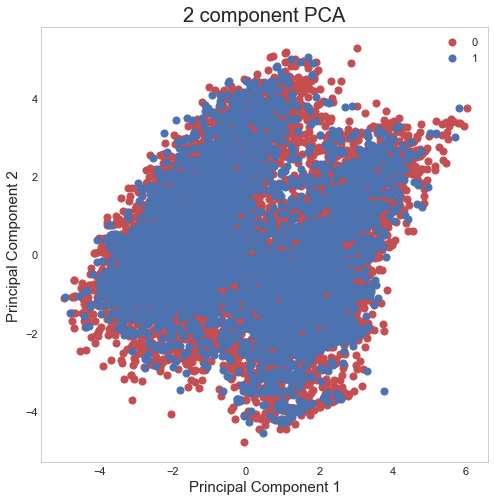

In [72]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['income'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [73]:
print(pca.explained_variance_)


[3.96301309e+00 2.77916091e+00 2.26279205e+00 1.89946752e+00
 1.72889139e+00 1.48385701e+00 1.43993573e+00 1.40165889e+00
 1.31345658e+00 1.28839738e+00 1.25327109e+00 1.20735545e+00
 1.17058649e+00 1.14994361e+00 1.14085421e+00 1.12657679e+00
 1.11774846e+00 1.10556890e+00 1.08784592e+00 1.07823163e+00
 1.07229200e+00 1.06072698e+00 1.05552362e+00 1.04539104e+00
 1.03657445e+00 1.03009465e+00 1.02254752e+00 1.01669398e+00
 1.01530386e+00 1.00968011e+00 1.00520164e+00 1.00172383e+00
 9.97136181e-01 9.90769556e-01 9.87264109e-01 9.81195017e-01
 9.70886579e-01 9.67734410e-01 9.49715776e-01 9.46824837e-01
 9.36800159e-01 9.33297171e-01 8.95019529e-01 8.81163085e-01
 8.74430009e-01 8.43716009e-01 7.86007841e-01 7.44543155e-01
 7.17101373e-01 6.58136046e-01 6.09006556e-01 5.07797514e-01
 4.37416542e-01 1.58897254e-02 8.09566713e-31 1.90430400e-31
 9.88413724e-32 8.64856570e-32 7.77662507e-32 6.80863871e-32
 8.49457434e-33]


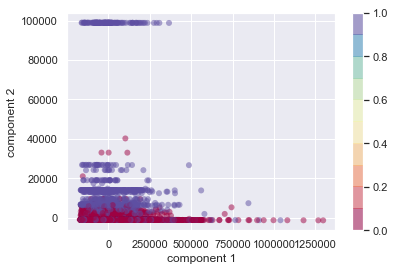

In [28]:
import seaborn as sns; sns.set()

plt.scatter(projected[:, 0], projected[:, 1],
            c=new_df['income'], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();